# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

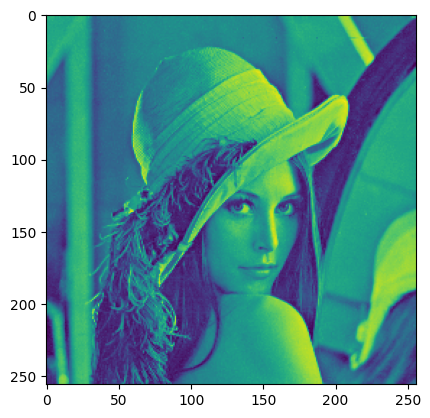

In [4]:
lena = plt.imread("data/lena.png")
plt.imshow(lena)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [40]:
def prewitt_v(img):
    # write your code here
    filter = numpy.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    result = numpy.zeros(img.shape)
    n = 1
    neighborhood_value_mean = 0
    for p in numpy.ndindex(img.shape[1]-2, img.shape[0]-2):
        neighborhood_value = 0
        for q in numpy.ndindex(3, 3):
            weight = filter[q[1],q[0]]
            #if q[1] == p[1]:
            #    weight = 1
            #elif q[1] == p[1]+1:
            #    weight = 0
            #elif q[1] == p[1]+2:
            #    weight = -1
            neighborhood_value = neighborhood_value + (weight*img[p[1]+q[1],p[0]+q[0]])
        neighborhood_value_mean = neighborhood_value/6
        result[p[1]+1, p[0]+1] = neighborhood_value_mean
    return result


    
def prewitt_h(img):
    filter = numpy.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    result = numpy.zeros(img.shape)
    n = 1
    neighborhood_value_mean = 0
    for p in numpy.ndindex(img.shape[1]-2, img.shape[0]-2):
        neighborhood_value = 0
        for q in numpy.ndindex(3, 3):
            weight = filter[q[1], q[0]]
            
            neighborhood_value = neighborhood_value + (weight*img[p[1]+q[1],p[0]+q[0]])
        neighborhood_value_mean = neighborhood_value/6
        result[p[1]+1, p[0]+1] = neighborhood_value_mean
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

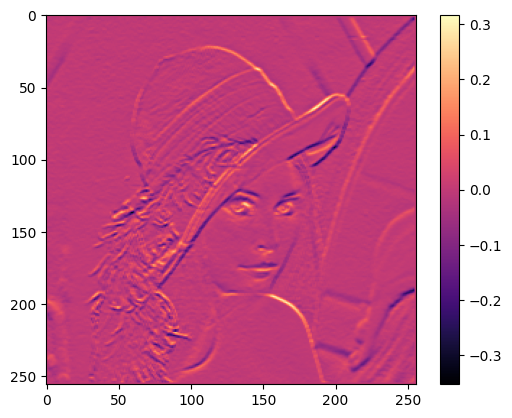

In [28]:
plt.imshow(prewitt_h(lena), "magma")
plt.colorbar()


**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

In [42]:
import skimage.io

lena_p_h = skimage.io.imread("data/lena_prewitt_h.tiff")
lena_p_v = skimage.io.imread("data/lena_prewitt_v.tiff")

assert numpy.allclose(prewitt_h(lena), lena_p_h, atol=1/255)

assert numpy.allclose(prewitt_v(lena), lena_p_v, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

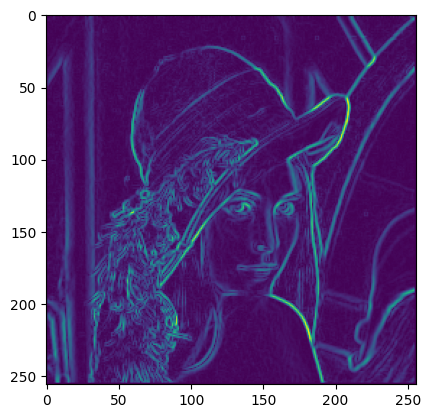

In [45]:
mag = numpy.sqrt((prewitt_h(lena)*prewitt_h(lena)) + (prewitt_v(lena)*prewitt_v(lena)))
plt.imshow(mag)

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

In [ ]:
lena_mag = skimage.io.imread("data/lena_prewitt_gradmag.tiff")
assert numpy.allclose(lena_mag, mag, atol=1/255)


---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: